In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
df = pd.read_csv('AirPassengers.csv')
df.head(3)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [3]:
dateparse = lambda dates : pd.datetime.strptime(dates , '%Y-%m')
df = pd.read_csv('AirPassengers.csv',parse_dates=['Month'], index_col='Month', date_parser=dateparse)
df.head(3)

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [4]:
ts = df['#Passengers']
ts.head() 

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [5]:
ts['1949-09-01']

136

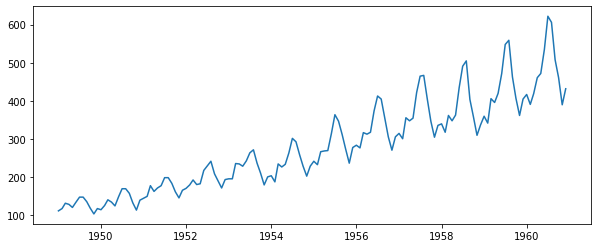

In [6]:
plt.figure(figsize=(10,4))
plt.plot(ts)

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining Rolling Statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    #Plot Rolling Statistics
    plt.figure(figsize=(12,5))
    orig = plt.plot(timeseries,color = 'blue',label = 'Original')
    mean = plt.plot(rolmean,color = 'red',label = 'Rolling Mean')
    std = plt.plot(rolstd,color = 'black',label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Std')
    plt.show(block=False)
    
    #Perform Dickey-Fuller Test
    print('Result of Dickey-Fuller Test - ')
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

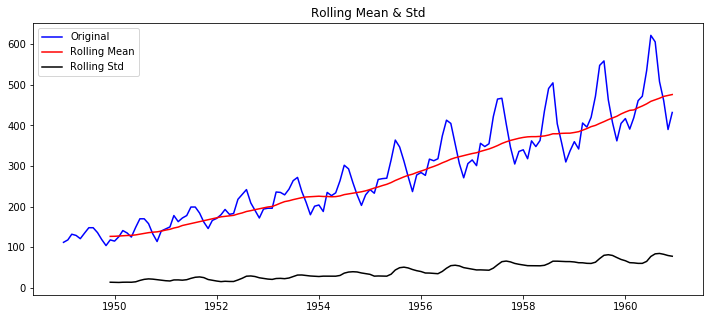

Result of Dickey-Fuller Test - 
Test Statistics                  0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [9]:
test_stationarity(ts)

# Making ts Stationary

# Estimating & Eliminating Trend

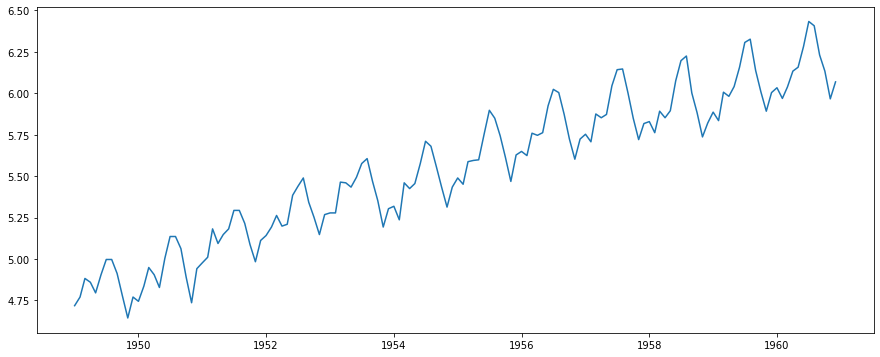

In [10]:
ta_log = np.log(ts)
plt.plot(ta_log)

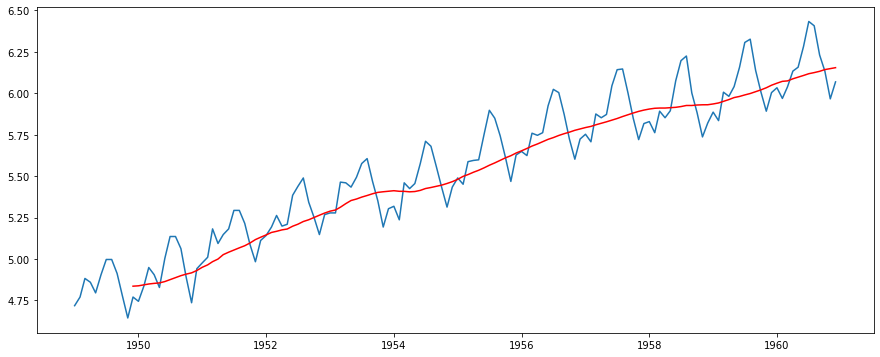

In [11]:
mov_avg = ta_log.rolling(window=12).mean()
plt.plot(ta_log)
plt.plot(mov_avg,color = 'red')

In [12]:
ta_log_mov_avg_diff = ta_log -mov_avg
ta_log_mov_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [13]:
ta_log_mov_avg_diff.dropna(inplace=True)
ta_log_mov_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

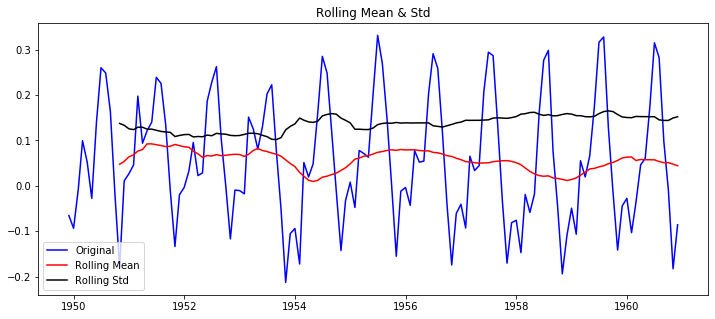

Result of Dickey-Fuller Test - 
Test Statistics                 -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [14]:
test_stationarity(ta_log_mov_avg_diff)

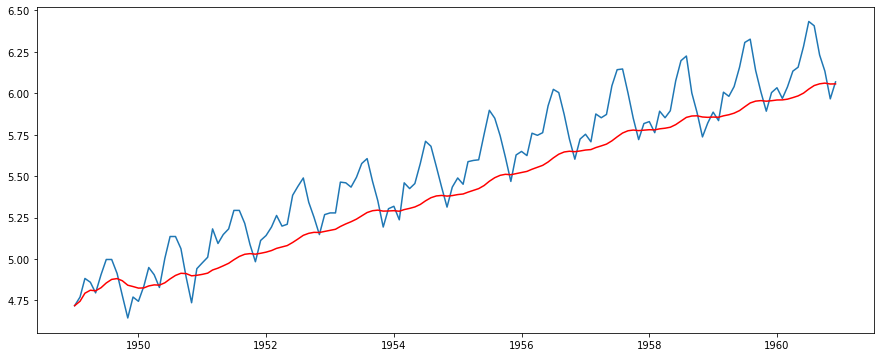

In [15]:
expweighted_avg = ta_log.ewm(halflife=12).mean()
plt.plot(ta_log)
plt.plot(expweighted_avg,color = 'red')

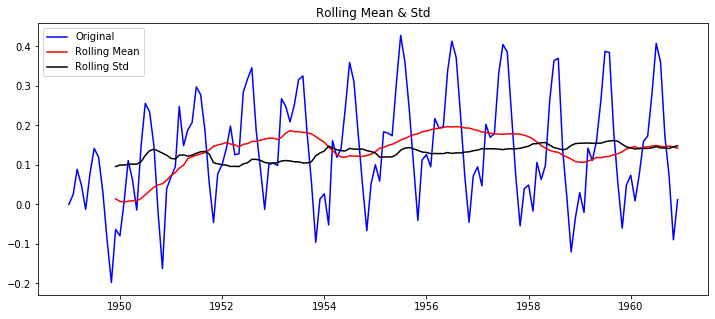

Result of Dickey-Fuller Test - 
Test Statistics                 -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [16]:
ta_log_ewma_diff = ta_log - expweighted_avg
test_stationarity(ta_log_ewma_diff)

# Eliminating Trend and Seasonality

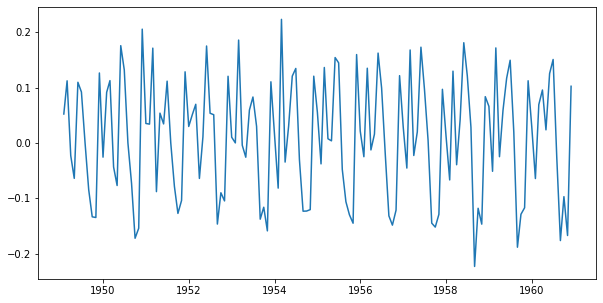

In [17]:
plt.figure(figsize=(10,5))
ta_log_diff = ta_log - ta_log.shift()
plt.plot(ta_log_diff)

<Figure size 864x432 with 0 Axes>

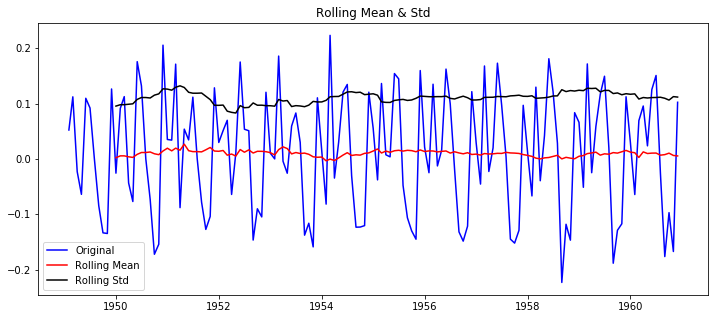

Result of Dickey-Fuller Test - 
Test Statistics                 -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [18]:
plt.figure(figsize=(12,6))
ta_log_diff.dropna(inplace=True)
test_stationarity(ta_log_diff)

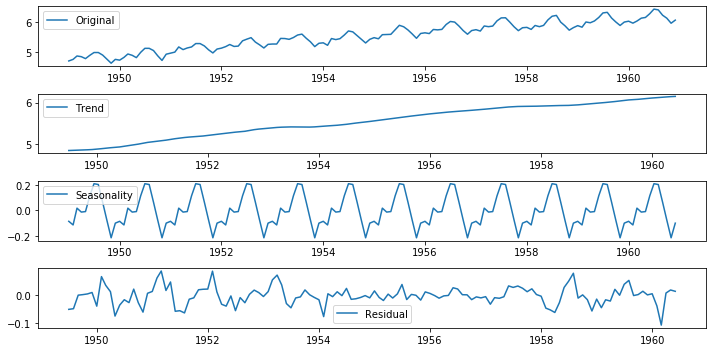

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompostion =seasonal_decompose(ta_log)

trend = decompostion.trend
seasonal = decompostion.seasonal
residual = decompostion.resid

plt.figure(figsize=(10,5))
plt.subplot(411)
plt.plot(ta_log,label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label = 'Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label = 'Residual')
plt.legend(loc='best')
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

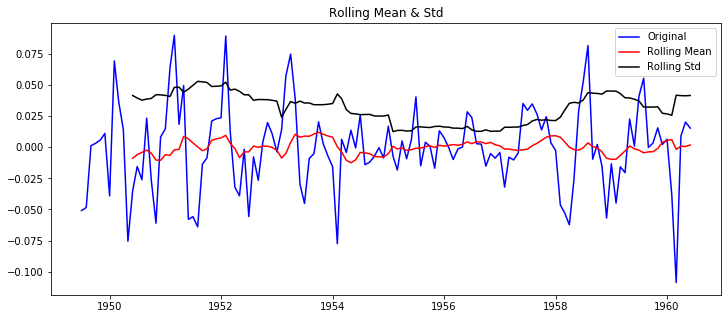

Result of Dickey-Fuller Test - 
Test Statistics               -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [24]:
plt.figure(figsize=(12,6))
ta_log_decompose = residual

ta_log_decompose.dropna(inplace=True)
test_stationarity(ta_log_decompose)

# Final Forecasting

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0.5, 1.0, 'Partial Autocorrelation Function')

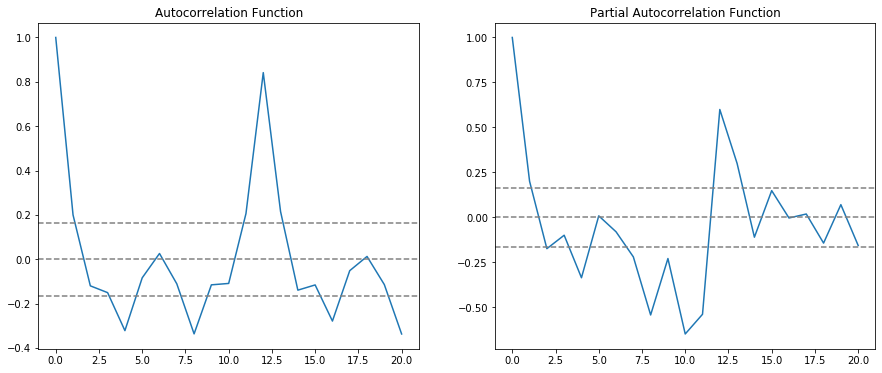

In [27]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(ta_log_diff,nlags=20)
lag_pacf = pacf(ta_log_diff,nlags=20,method='ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--' , color='grey')
plt.axhline(y = -1.96/np.sqrt(len(ta_log_diff)),linestyle='--',color='grey')
plt.axhline(y = 1.96/np.sqrt(len(ta_log_diff)),linestyle='--',color='grey')

plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--' , color='grey')
plt.axhline(y = -1.96/np.sqrt(len(ta_log_diff)),linestyle='--',color='grey')
plt.axhline(y = 1.96/np.sqrt(len(ta_log_diff)),linestyle='--',color='grey')

plt.title('Partial Autocorrelation Function')

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

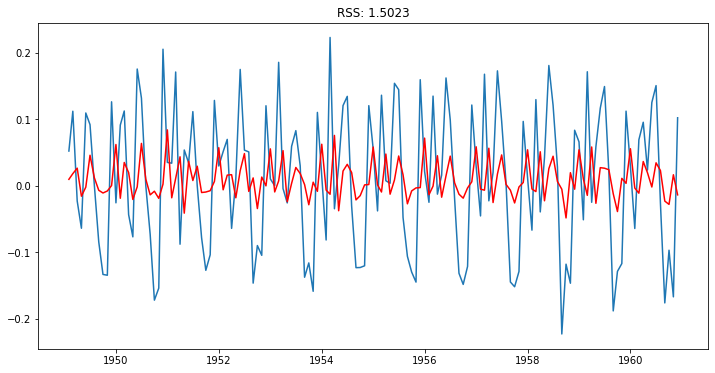

In [33]:
model = ARIMA(ta_log,order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(12,6))
plt.plot(ta_log_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ta_log_diff)**2) )

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

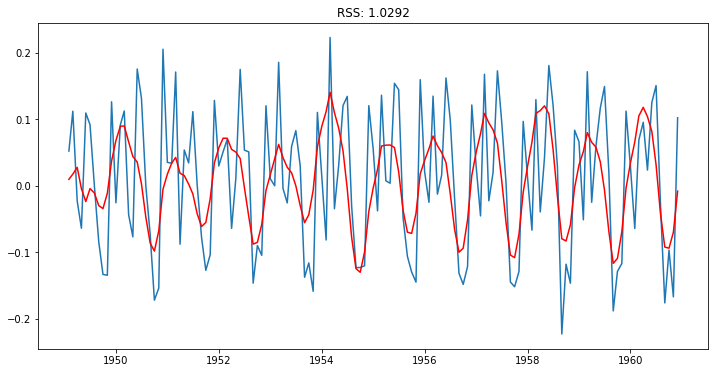

In [35]:
model = ARIMA(ta_log,order=(2, 1, 2))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(12,6))
plt.plot(ta_log_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ta_log_diff)**2) )

# Converting to original scale

In [37]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [38]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


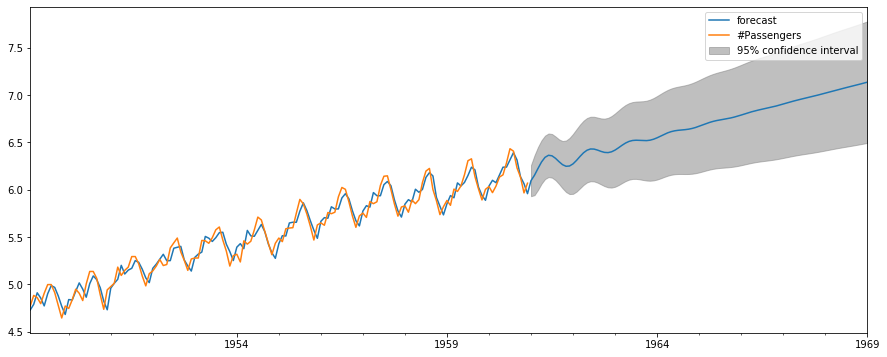

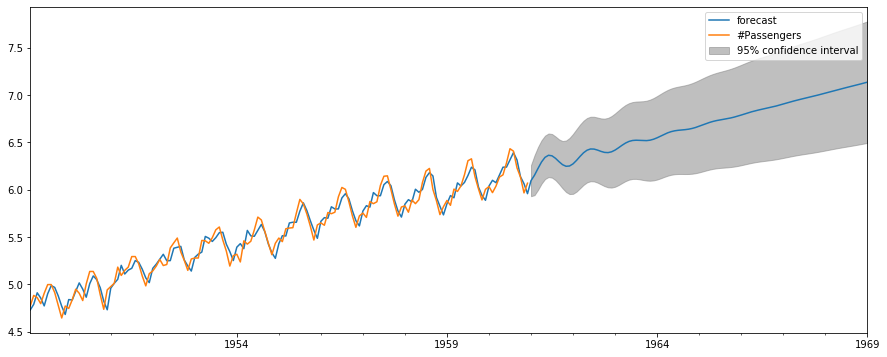

In [49]:
results_AR.plot_predict(1,240)